In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import random #q43

## Questão 20
Abrir uma imagem colorida, transformar para tom de cinza e aplique a técnica Crescimento de Regiões (Region Growing). Para isto, inicialmente faça uma imagem com dimensões 320×240 no paint, onde o fundo da imagem seja branco e exista um círculo preto no centro. Utilize algum ponto dentro do circulo preto como semente, onde você deve determinar este ponto analisando imagem previamente. A regra de adesão do método deve ser: “Sempre que um vizinho da região possuir tom de cinza menor que 127, deve-se agregar este vizinho à região”. Aplique o Crescimento de Regiões de forma iterativa, em que o algoritmo irá estabilizar apenas quando a região parar de crescer.

In [2]:
@njit
def region_growing(image, seed=None):

    # Get the rows and columns of the image
    rows, cols = image.shape[:2]

    # Get the seed point
    xc, yc = seed

    # Create a matrix that will contain the segmented region
    segmented = np.zeros_like(image)

    # Mark the seed point in the image
    segmented[xc, yc] = 255

    # Loop through the image until the region stop growing
    current_found = 0
    previous_points = 1

    while previous_points != current_found:

        previous_points = current_found
        current_found = 0
        for row in range(rows):
            for col in range(cols):
                # Verify if we reach the ROI and search through the neighborhood to see if the pixel is of the same
                # object, then if the pixel is part of the object put them in the segmented image
                if segmented[row, col] == 255:
                    if image[row - 1, col - 1] < 127:
                        segmented[row - 1, col - 1] = 255
                        current_found += 1
                    if image[row - 1, col] < 127:
                        segmented[row - 1, col] = 255
                        current_found += 1
                    if image[row - 1, col + 1] < 127:
                        segmented[row - 1, col + 1] = 255
                        current_found += 1
                    if image[row, col - 1] < 127:
                        segmented[row, col - 1] = 255
                        current_found += 1
                    if image[row, col + 1] < 127:
                        segmented[row, col + 1] = 255
                        current_found += 1
                    if image[row + 1, col - 1] < 127:
                        segmented[row + 1, col - 1] = 255
                        current_found += 1
                    if image[row + 1, col] < 127:
                        segmented[row + 1, col] = 255
                        current_found += 1
                    if image[row + 1, col + 1] < 127:
                        segmented[row + 1, col + 1] = 255
                        current_found += 1

    return segmented

True

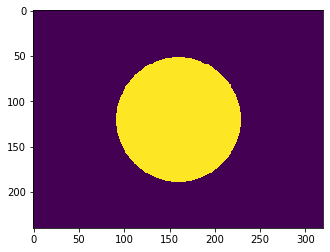

In [4]:
    # Read a rgb image
image = cv2.imread('img/q20.jpg')

    # Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the region growing algorithm
segmented_image = region_growing(grayscale_image,
                                 seed=(int(grayscale_image.shape[0]/2), int(grayscale_image.shape[1]/2)))

    # Show the result
#cv2.imshow('Segmented image', segmented_image)
#cv2.waitKey(0)

plt.imshow(segmented_image)

# Save the result
cv2.imwrite('result/segmented_image.jpg', segmented_image)


## Questão 28
    Abrir uma imagem colorida, transformar para tom de cinza e aplique e aplique a limiarização automática da própria Opencv, para que o limiar não dependa da aplicação e nem da luminosidade do local.

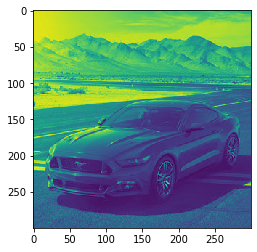

In [6]:
# Read a rgb image
image = cv2.imread('img/image.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Show the input image
#cv2.imshow('Input grayscale image', grayscale_image)
plt.imshow(grayscale_image)

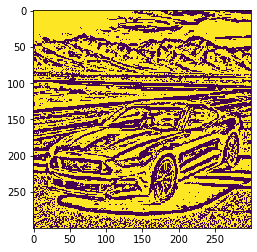

In [7]:
# Apply an adaptive threshold
thresholded_image = cv2.adaptiveThreshold(grayscale_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Show the result of the adaptive threshold
#cv2.imshow('Threshold result', thresholded_image)
#cv2.waitKey(0)
plt.imshow(thresholded_image)

## Questão 30
Abrir uma imagem colorida, transformar para tom de cinza e aplique a transformada de canny para detectar bordas. Apliquem o método cvFindContours para determinar quantos contornos existem na imagem. Apresentem o resultado obtido e a imagem de entrada. O retorno deve ser a mesma quantidade de objetos existentes.

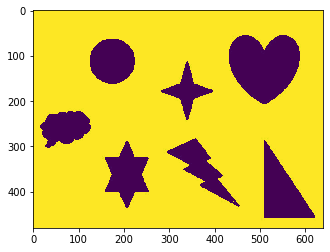

In [8]:
# Read a rgb image
image = cv2.imread('img/q30.png')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the input image
##cv2.imshow('Input grayscale image', grayscale_image)
plt.imshow(grayscale_image)

In [9]:
# Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)

# Find how many contours are in the image
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image to draw the contours
contour_img = np.copy(image)

# Draw all the contours found
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 3)

# Show the contours found
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)

13

## Questão 31
Após fazer a questão 30, destaque cada objeto encontrado desenhando um retângulo indicando onde os mesmos se encontram. Utilizar a função “cvContourBoundingRect” para determinar cada contorno. Ressalto que é necessário percorrer os contornos encontrados na função “cvFindContours” de forma correta.

### Read a rgb image
image = cv2.imread('img/q30.png')

### Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Show the input image
cv2.imshow('Input grayscale image', grayscale_image)

In [11]:
# Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)

# Find how many contours are in the image
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [12]:

# Find a polygon approximation for each contour and then find the bounding rect for every polygon
contours_poly = [None] * len(contours)
bound_rect = [None] * len(contours)

for i, contour in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(contour, 2, True)
    bound_rect[i] = cv2.boundingRect(contours_poly[i])


# Create a copy of the image to draw the contours
contour_img = np.copy(image)

# Draw the rectangles for every object
for i, contour in enumerate(contours_poly):
    cv2.rectangle(contour_img, (int(bound_rect[i][0]), int(bound_rect[i][1])),
                  (int(bound_rect[i][0]) + int(bound_rect[i][2]), int(bound_rect[i][1]) + bound_rect[i][3]),
                  (255, 0, 0), 2)



# Show the contours found
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)

13

Questão 32
Após fazer a questão 31, calcule a área de cada contorno obtido através da função “cvContourArea”, apresentando seu valor.

In [23]:
### Read a rgb image
image = cv2.imread('img/q30.png')

### Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Show the input image
cv2.imshow('Input grayscale image', grayscale_image)


In [24]:
# Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)


In [25]:
# Find how many contours are in the image
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

print(hierarchy)

# Create a copy of the image to draw the contours
contour_img = np.copy(image)

# Draw all the contours found
cv2.drawContours(contour_img, contours, -1, (0, 0, 255), 3)

# Print the area of each contour, notice that there are areas close to other areas. Therefore, can be considered
# areas of the same object
for i, contour in enumerate(contours):
    print('Area ' + str(i + 1) + ': ' + str(cv2.contourArea(contour)))


# Show the contours found
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [ 3  0 -1 -1]
  [ 5  2  4 -1]
  [-1 -1 -1  3]
  [ 7  3  6 -1]
  [-1 -1 -1  5]
  [ 9  5  8 -1]
  [-1 -1 -1  7]
  [11  7 10 -1]
  [-1 -1 -1  9]
  [13  9 12 -1]
  [-1 -1 -1 11]
  [15 11 14 -1]
  [-1 -1 -1 13]
  [-1 13 16 -1]
  [-1 -1 -1 15]]]
Area 1: 4.0
Area 2: 2.0
Area 3: 73.5
Area 4: 7749.0
Area 5: 7743.5
Area 6: 10254.5
Area 7: 10199.5
Area 8: 37.0
Area 9: 2.0
Area 10: 6406.5
Area 11: 6361.0
Area 12: 4303.5
Area 13: 4298.0
Area 14: 7919.0
Area 15: 7873.0
Area 16: 17413.0
Area 17: 17296.0


13

## Questão 33
Após fazer a questão 31, gere uma subimagem utilizando o retângulo encontrado para cada objeto ou contorno encontrado.

## open image + canny
### Read a rgb image
image = cv2.imread('image.png')

### Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)

### Find how many contours are in the image. Note the new parameter cv2.RETR_EXTERNAL. Now the function gives only the

### external rects
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
# Find a polygon approximation for each contour and then find the bounding rect for every polygon
contours_poly = [None] * len(contours)
bound_rect = [None] * len(contours)

for i, contour in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(contour, 2, True)
    bound_rect[i] = cv2.boundingRect(contours_poly[i])


# Create a copy of the image to draw the contours
contour_img = np.copy(image)

In [28]:
# Draw the rectangles for every object
for i, contour in enumerate(contours_poly):
    cv2.rectangle(contour_img, (int(bound_rect[i][0]), int(bound_rect[i][1])),
                  (int(bound_rect[i][0]) + int(bound_rect[i][2]), int(bound_rect[i][1]) + bound_rect[i][3]),
                  (255, 0, 0), 2)

    # Crop each object
    crop = contour_img[int(bound_rect[i][1]):int(bound_rect[i][1]) + bound_rect[i][3],
                       int(bound_rect[i][0]):int(bound_rect[i][0]) + int(bound_rect[i][2])]

    cv2.imshow('Object ' + str(i + 1), crop)
    cv2.waitKey(10)

In [29]:
# Show the contours found
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)

13

Questão 34
Verificar se está ocorrendo acumulo de memória a cada iteração, aprendendo a apagar cada objeto quando não usar mais os mesmos.

In [31]:
# Read a rgb image
image = cv2.imread('img/q30.png')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a copy of the image to draw the contours
contour_img = np.copy(image)

# Delete variable to free memory
del image

In [32]:
# Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)

# Find how many contours are in the image
contours, hierarchy = cv2.findContours(canny_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Delete variable to free memory
del canny_image
del hierarchy

In [33]:
# Find a polygon approximation for each contour and then find the bounding rect for every polygon
contours_poly = [None] * len(contours)
bound_rect = [None] * len(contours)

for i, contour in enumerate(contours):
    contours_poly[i] = cv2.approxPolyDP(contour, 2, True)
    bound_rect[i] = cv2.boundingRect(contours_poly[i])

# Draw the rectangles for every object, there are two contours for each object because canny find the edges
# and when findcontours is applied it will find an inner and an outer contour
for i, contour in enumerate(contours_poly):
    cv2.rectangle(contour_img, (int(bound_rect[i][0]), int(bound_rect[i][1])),
                  (int(bound_rect[i][0]) + int(bound_rect[i][2]), int(bound_rect[i][1]) + bound_rect[i][3]),
                  (255, 0, 0), 2)

    # Crop each object
    crop = contour_img[int(bound_rect[i][1]):int(bound_rect[i][1]) + bound_rect[i][3],
                       int(bound_rect[i][0]):int(bound_rect[i][0]) + int(bound_rect[i][2])]

    cv2.imshow('Object ' + str(i + 1), crop)
    cv2.waitKey(10)

    # Delete variable to free memory
    del crop

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)

del grayscale_image

# Show the contours found
cv2.imshow('Contours', contour_img)
cv2.waitKey(0)

13

Questão 38
Faça o mesmo que a questão 37, alterando o elemento estruturante e
 sua referência e verifique o que acontece.


In [3]:

# Read a rgb image
image = cv2.imread('img/q35.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)

# Apply the threshold
ret, threshold_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Show the result of the threshold
cv2.imshow('Threshold image', threshold_image)


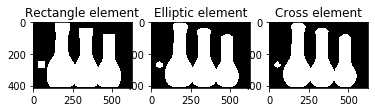

In [5]:

# Create the structuring element
structuring_elements = [cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS]


# Apply dilation and show the results for each structuring element
plt.figure(1)
titles = ['Rectangle element', 'Elliptic element', 'Cross element']
for i, element in enumerate(structuring_elements):
    kernel = cv2.getStructuringElement(element, (7, 7))
    dilation = cv2.dilate(threshold_image, kernel, iterations=7)

    fig = 130 + (i+1)
    plt.subplot(fig)
    plt.title(titles[i])
    plt.imshow(dilation, cmap='gray')


Abrir uma imagem colorida, transformar para tom de cinza e aplique a limiarização de otsu. Apliquem o método cvErode de forma iterativa, apresentando o resultado de cada iteração, verificando o que o método causa. Utilize um elemento estruturante com uma linha e três colunas, com a referencia no centro, então o objeto deve diminuir apenas na vertical, pois o elemento estruturante é vertical. O objeto deve ser branco e o fundo preto.

Faça o mesmo que a questão 39, alterando o elemento estruturante e sua referência e verifique o que acontece.


In [ ]:
# Read a rgb image
image = cv2.imread('img/q35.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)

# Apply the threshold
ret, threshold_image = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Show the result of the threshold
cv2.imshow('Threshold image', threshold_image)


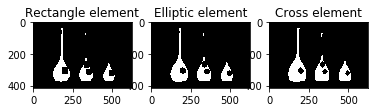

In [6]:
# Create the structuring element
structuring_elements = [cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS]


# Apply erosion and show the results for each structuring element
plt.figure(1)
titles = ['Rectangle element', 'Elliptic element', 'Cross element']
for i, element in enumerate(structuring_elements):
    kernel = cv2.getStructuringElement(element, (5, 5))
    erosion = cv2.erode(threshold_image, kernel, iterations=7)

    fig = 130 + (i+1)
    plt.subplot(fig)
    plt.title(titles[i])
    plt.imshow(erosion, cmap='gray')

plt.show()

## Questão 41
Abrir uma imagem colorida, transformar para tom de cinza e aplique a transformada de canny para detectar bordas. Apliquem a biblioteca “blob” para determinar quantos contornos existem na imagem. Apresentem o resultado obtido e a imagem de entrada. O retorno deve ser a mesma quantidade de objetos existentes.

## What is a Blob ?
A Blob is a group of connected pixels in an image that share some common property ( E.g grayscale value ). In the image above, the dark connected regions are blobs, and the goal of blob detection is to identify and mark these regions.

In [18]:
# Read a rgb image
image = cv2.imread('img/q41.jpg')

# Transform to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply the Canny filter
canny_image = cv2.Canny(grayscale_image, 80, 180)

In [19]:
# Create a blob detector
# detector = cv2.SimpleBlobDetector_create()

# Define the parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 20
params.maxArea = 40000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.8

# Distance Between Blobs
params.minDistBetweenBlobs = 20

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

In [20]:
# Detect objects
blobs = detector.detect(canny_image)

# Print how many objects are in the image
print(len(blobs))

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)
cv2.waitKey(0)

7


13

## Questão 43
 Dados da questão anterior, porém pintando o mesmo ou apresentando quadrados ao seus redor dos objetos, ou ambos.

In [21]:

# Print how many objects are in the image
print(len(blobs))

rows, cols = image.shape[:2]

# Draw blobs
for k in blobs:

    # Get the coordinates of up_left and bottom_right
    x_up_left = int(k.pt[0] - k.size)
    y_up_left = int(k.pt[1] - k.size)

    x_bottom_right = int(k.pt[0] + k.size)
    y_bottom_right = int(k.pt[1] + k.size)

    # Verify if this coordinates are inside the limits of the image, correct if it is not inside the limits
    if x_up_left < 0:
        x_up_left = 0
    if y_up_left < 0:
        y_up_left = 0

    if x_bottom_right > cols:
        x_bottom_right = cols
    if y_bottom_right > rows:
        y_bottom_right = rows

    # Draw the rectangle
    cv2.rectangle(image, (x_up_left + 15, y_up_left + 15), (x_bottom_right - 15, y_bottom_right - 15), (255, 0, 0), 2)


7


In [22]:
# Show the result
cv2.imshow('Result', image)

# Show the input image
cv2.imshow('Input grayscale image', grayscale_image)
cv2.waitKey(0)

13

## Questão 44
Após fazer a questão 41 a 43, gerem subimagens com cada objeto encontrado.

In [23]:
# Print how many objects are in the image
print(len(blobs))

rows, cols = image.shape[:2]

# Draw blobs
for i, k in enumerate(blobs):

    # Get the coordinates of up_left and bottom_right
    x_up_left = int(k.pt[0] - k.size)
    y_up_left = int(k.pt[1] - k.size)

    x_bottom_right = int(k.pt[0] + k.size)
    y_bottom_right = int(k.pt[1] + k.size)

    # Verify if this coordinates are inside the limits of the image, correct if it is not inside the limits
    if x_up_left < 0:
        x_up_left = 0
    if y_up_left < 0:
        y_up_left = 0

    if x_bottom_right > cols:
        x_bottom_right = cols
    if y_bottom_right > rows:
        y_bottom_right = rows

    # # Draw the rectangle
    # cv2.rectangle(image, (x_up_left + 15, y_up_left + 15), (x_bottom_right - 15, y_bottom_right - 15), (255, 0, 0), 2)

    # Crop each object
    crop = image[y_up_left + 15:y_bottom_right - 15, x_up_left + 15:x_bottom_right - 15]

    # Show the objects
    cv2.imshow('Object ' + str(i + 1), crop)
    cv2.waitKey(10)


7


## Questão 45
Após fazer a questão 42, apliquem filtros de altura, largura e área para selecionar apenas os contronos que desejam. Apliquem outros filtros para ver o que acontece. Peçam para imprimir os valor encontrados que dá pra ter uma noção melhor dos valores que devem ser usados nos filtros.

In [28]:
# Define the parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by Area.
params.filterByArea = True
params.minArea = 20
params.maxArea = 10000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.8

# Distance Between Blobs
params.minDistBetweenBlobs = 20

# Create a blob detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect objects
blobs = detector.detect(canny_image)

# Print how many objects are in the image
print(len(blobs))

rows, cols = image.shape[:2]


1


In [29]:
# Draw blobs
for i, k in enumerate(blobs):

    # Get the coordinates of up_left and bottom_right
    x_up_left = int(k.pt[0] - k.size)
    y_up_left = int(k.pt[1] - k.size)

    x_bottom_right = int(k.pt[0] + k.size)
    y_bottom_right = int(k.pt[1] + k.size)

    # Verify if this coordinates are inside the limits of the image, correct if it is not inside the limits
    if x_up_left < 0:
        x_up_left = 0
    if y_up_left < 0:
        y_up_left = 0

    if x_bottom_right > cols:
        x_bottom_right = cols
    if y_bottom_right > rows:
        y_bottom_right = rows

    # # Draw the rectangle
    # cv2.rectangle(image, (x_up_left + 15, y_up_left + 15), (x_bottom_right - 15, y_bottom_right - 15), (255, 0, 0), 2)

    # Crop each object
    crop = image[y_up_left + 15:y_bottom_right - 15, x_up_left + 15:x_bottom_right - 15]

    # Show the objects
    cv2.imshow('Object ' + str(i + 1), crop)
    cv2.waitKey(10)


## Para fechar todas as imagens

In [30]:
#para fechar todas as janelas abertas
while(True):
    k = cv2.waitKey(33)
    if k == -1:  # if no key was pressed, -1 is returned
        continue
    else:
        break
cv2.destroyAllWindows()